# 1. Hello Qiskit (A Quick Introduction)

Author : [Gwonhak Lee](https://github.com/snow0369) (gwonhak@gmail.com)


-----

 Qiskit 활용의 간단한 예시로써, Bell 상태 측정에 대한 회로를 구현하고, CPU를 이용한 양자회로 시뮬레이션을 수행합니다.


$ | \text{Bell}_{00}\rangle = \frac {1} {\sqrt{2}} (| 00 \rangle + | 11 \rangle $)

기본적인 qiskit 개발의 단계는 다음과 같이 생각할 수 있습니다.

1. 양자회로 구성
    1. 객체의 선언 (qubits, classical bits, quantum circuit)
    2. 게이트를 적용하여 회로 구성

2. 양자회로 실행
    1. 양자실험 (시뮬레이션 혹은 실제 양자프로세서)
    2. 결과 획득 및 시각화

각 단계에 대한 예시를 구체적으로 살펴보도록 하겠습니다.

### 0. 필요한 요소 불러오기

 먼저 필요한 Package를 불러옵니다.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.providers.aer import AerProvider
from qiskit import execute

### 1-1. 양자회로 구현을 위한 객체 선언

 다음으로, 회로 구현에 필요한 양자 및 고전 bit registers(저장공간)와 양자회로를 선언합니다.

 Bell state를 구현하기 위해 2개의 qubit, `qr`과, 이를 측정하는 2개의 Classical bit `cr`,
 그리고 이들을 포함하는 양자회로 `qc`를 선언합니다.

In [2]:
qr = QuantumRegister(2) # 2 qubits
cr = ClassicalRegister(2) # 2 classical bits
qc = QuantumCircuit(qr, cr) # a quantum circuit with 2 qubits and 2 bits

다음으로, 선언한 양자회로를 출력하여 확인합니다.

(아직 어떠한 게이트도 놓지 않았기 때문에 빈 회로가 출력됩니다.)

In [3]:
qc.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

### 1-2. Bell 회로 구성

Bell상태를 준비하는 회로를 구현합니다.
 0번째 qubit에 hadamard 연산과 0번째, 1번째 qubit에 cnot 연산을 취한 뒤, 측정하여 `cr`에 저장합니다.

- 초기에 모든 qubit은 $|0\rangle$ 상태로 준비되어있습니다.
- 회로를 출력할 때, `'mpl'` 옵션을 넣어 텍스트가 아닌 그림 형태로 출력할 수 있습니다.

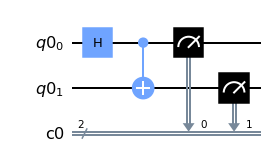

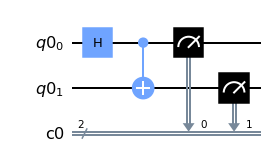

In [4]:
qc.h(qr[0]) # 0번째 qubit에 hadamard 연산을 취합니다.
qc.cx(qr[0], qr[1]) # 0번째 qubit을 control, 1번째 qubit를 target으로 하는 CNOT 연산을 취합니다.
qc.measure(qr, cr) # qr을 측정하여 cr에 저장하는 측정 연산을 취합니다.

qc.draw('mpl') # 완성된 회로를 출력합니다.

### 2-1. QASM 시뮬레이션

앞서 구성한 양자회로를 실행하기 위한 backend를 지정합니다. 지금은 QASM(Quantum Assembly Language) 시뮬레이션을 이용하여 실험하고,
[다음 튜토리얼](./2_simulators.ipynb)에서 다른 simulation backend를 실험할 것입니다.

먼저 qasm simulator backend를 불러옵니다.

In [5]:
qasm_simulator = AerProvider().get_backend('qasm_simulator')

다음으로, 실험을 진행하고 결과값을 얻습니다.

QASM 시뮬레이터에서는 실제 양자프로세서와 같이 `shots = 2048`에 해당하는 횟수의 동일한 양자실험을 반복하여 결과의 횟수
를 확인할 수 있습니다.

`get_counts()`를 통해 얻은 실험결과는 python의 기본 자료구조인 dictionary(`Dict[str, int]`)의 형태로,
Pauli-Z(Computational) basis에서 측정된 bitstring을 key로 하고 outcome의 횟수를 value로 합니다.

앞선 Bell State를 나타내는 식에서, $|00\rangle$상태와 $|11\rangle$ 이 동일한 확률로 관측될 것으로 예상되고
이를 확인할 수 있습니다.

In [6]:
job_qasm = execute(qc, backend=qasm_simulator, shots=2048)
counts = job_qasm.result().get_counts()

print("Bell measurement result")
for i, v in counts.items():
    print(i, v)

Bell measurement result
00 1015
11 1033


얻은 결과를 다음과 같이 시각화 할 수도 있습니다.

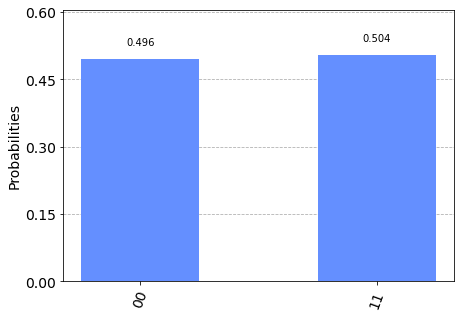

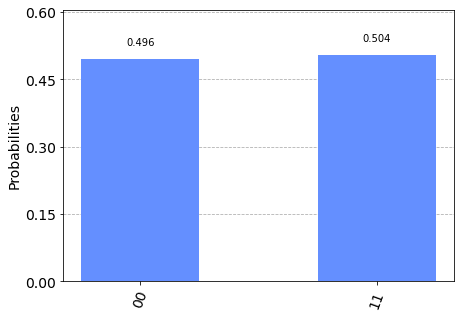

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)


 지금까지 간단한 Bell 상태를 나타내는 양자회로를 구현하고 QASM 시뮬레이터를 통해 실험을 수행하였습니다.

 이어서 다음 연습문제를 해결해보도록 하겠습니다.

### Exercise. GHZ 상태 측정
  Qubit 3개에 다음과 같은 GHZ 상태를 준비하고, 측정하는 회로를 구성하고, histogram을 출력합니다.

  $$ |GHZ_3\rangle = \frac{1}{\sqrt{2}} (|000\rangle + |111\rangle) $$

In [ ]:
# 객체의 선언
# qr_ghz_3 = QuantumRegister(?)
# cr_ghz_3 = ClassicalRegister(?)
# qc_ghz_3 = QuantumCircuit(?, ?)

# 회로 구성
# qc_ghz_3.?
# ...

# 회로 출력
# qc_ghz_3.draw('mpl')

In [ ]:
# qasm 시뮬레이션
# job_ghz_3_qasm = execute(qc_ghz_3, backend=qasm_simulator, shots=1024)
# counts = job_ghz_3_qasm.result().get_counts()

# 시각화
# plot_histogram(counts)